In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)},font_scale=1.5)

moms = pd.read_csv('jefas.csv', usecols=['edad', 'ascendencia',
       'estado_laboral', 'sueldo', 'busca_otro_trabajo', 'actividad',
       'asistencia alguna vez a enseñanza', 'edu preescolar', 'edu primaria',
       'edu media', 'edu técnica', 'edu univ o simil', 'edu terciario no uni',
       'edu posgrado', 'edu mag prof', 'hijos'])

moms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   edad                               29322 non-null  float64
 1   ascendencia                        29322 non-null  object 
 2   estado_laboral                     29322 non-null  object 
 3   sueldo                             29322 non-null  float64
 4   busca_otro_trabajo                 29322 non-null  object 
 5   actividad                          14943 non-null  object 
 6   asistencia alguna vez a enseñanza  29322 non-null  object 
 7   edu preescolar                     29322 non-null  object 
 8   edu primaria                       29322 non-null  object 
 9   edu media                          29322 non-null  object 
 10  edu técnica                        29322 non-null  object 
 11  edu univ o simil                   29322 non-null  obj

In [2]:
moms['busca_otro_trabajo'] = moms['busca_otro_trabajo'].astype('str')

moms = moms[~moms['busca_otro_trabajo'].str.contains('0.0')]

In [3]:
for i in list(moms.columns):
    if moms[i].dtype == 'object':
        moms[i] = moms[i].astype("category").cat.codes

moms.sample(3)

edad  ascendencia  estado_laboral   sueldo  busca_otro_trabajo  \
7846   50.0            1               1  16000.0                   0   
27929  69.0            2               1      0.0                   0   
21693  57.0            2               1  23000.0                   0   

       actividad  asistencia alguna vez a enseñanza  edu preescolar  \
7846         324                                  1               2   
27929        282                                  1               1   
21693        113                                  1               1   

       edu primaria  edu media  edu técnica  edu univ o simil  \
7846              1          0            2                 0   
27929             1          2            2                 0   
21693             1          3            3                 2   

       edu terciario no uni  edu posgrado  edu mag prof  hijos  
7846                      0             0             0      2  
27929                     0             0             0      0  
21693                     2             0             2      0

<AxesSubplot:>

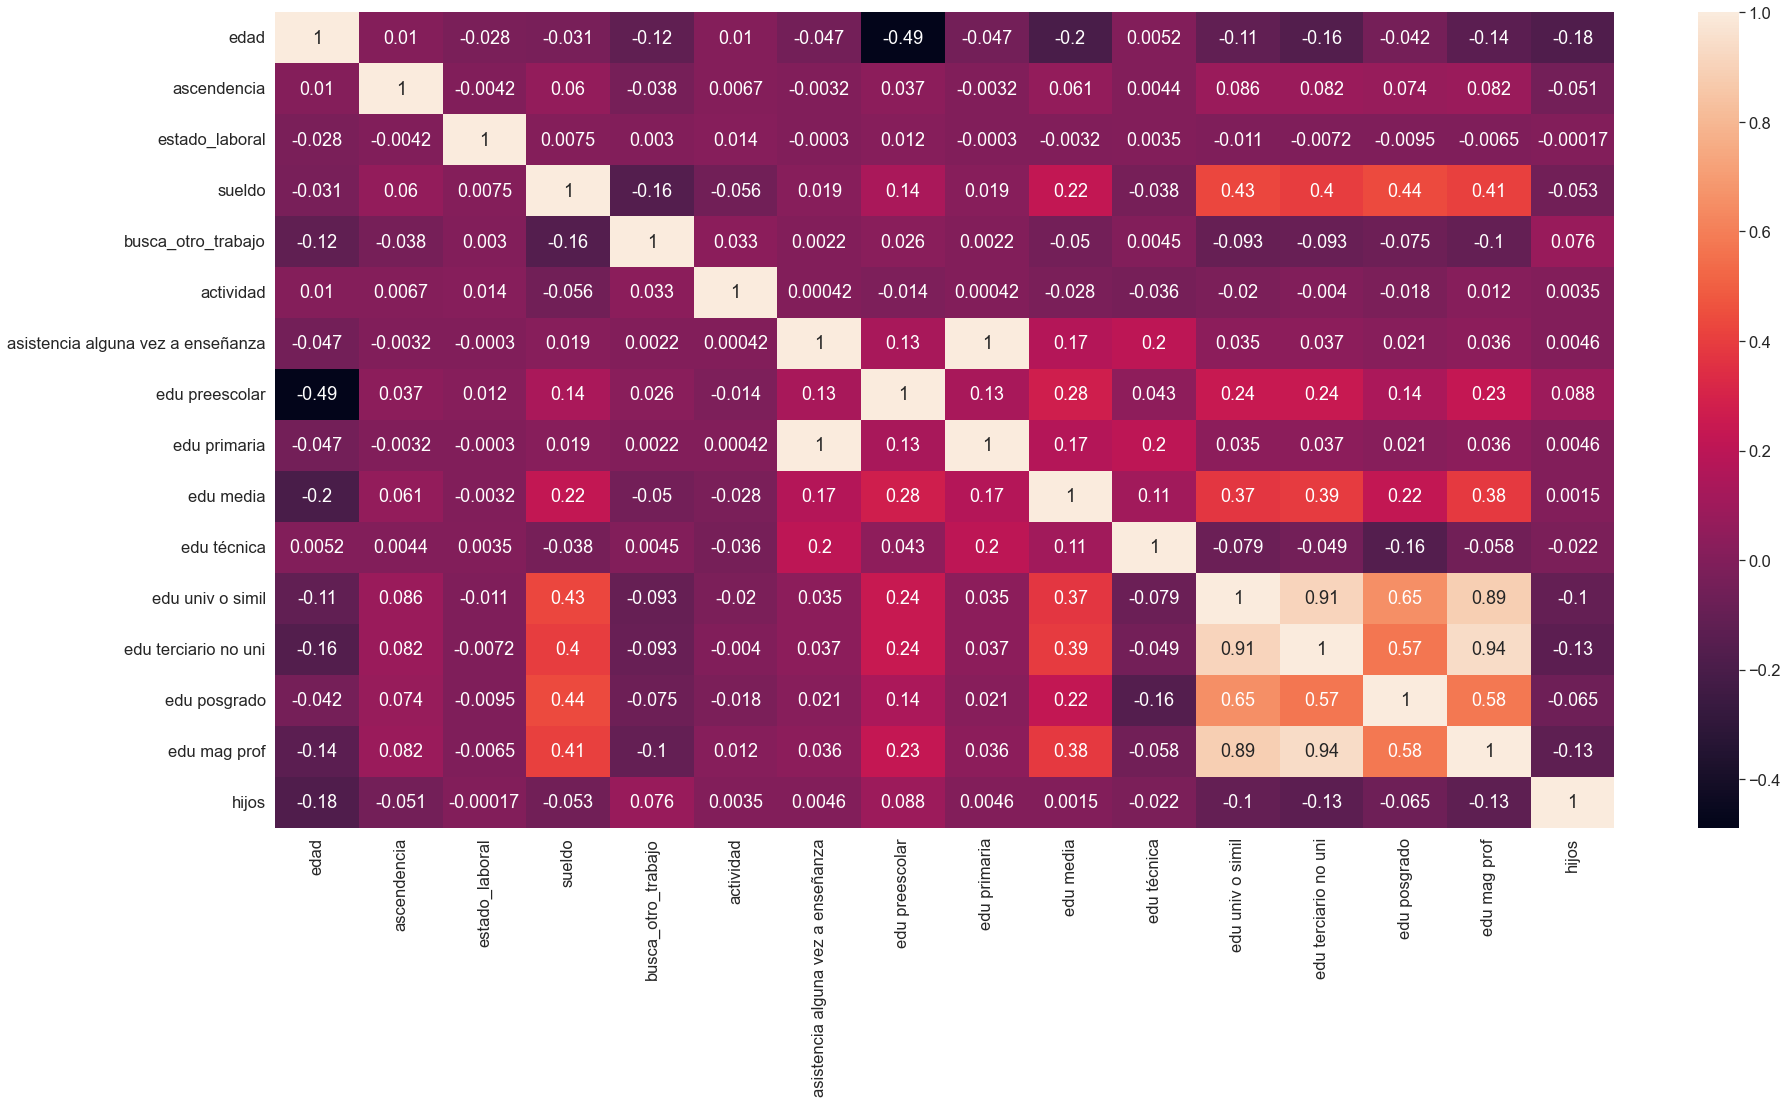

In [4]:
corr = moms.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [5]:
from sklearn import preprocessing
norm = preprocessing.normalize

# Feautures
X = moms['sueldo'].values.reshape(-1, 1)
X = norm(X, norm='l1')

y = moms['busca_otro_trabajo'].to_numpy()

print('X shape', X.shape, '\nY shape', y.shape)

X shape (14943, 1) 
Y shape (14943,)


In [6]:
np.unique(y)

array([0, 1], dtype=int8)

In [7]:
# Split #30% test, 70% para train
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10460, 1) (10460,)
(4483, 1) (4483,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression(max_iter=20000)

clf = logistic_regression.fit(X_train, y_train)

scores = cross_val_score(clf, X, y, cv=10)

scores

array([0.88026756, 0.88026756, 0.88026756, 0.88085676, 0.88085676,
       0.88085676, 0.88085676, 0.88085676, 0.88018742, 0.88018742])

In [10]:
clf.score(X_test, y_test)

0.8813294668748606

In [11]:
clf.score(X_train, y_train)

0.8802103250478012

In [12]:
prediction = np.array([10000, 20000, 5000, 80000, 3000, 100]).reshape(-1,1)
logistic_regression.predict(prediction)

array([0, 0, 0, 0, 0, 0], dtype=int8)

In [13]:
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=10, shuffle=True)

# for train, test in kf.split(X):
#     print("%s %s" % (train, test))